* Project Definition :
  
    - Goal ~ To analyze car sales data
    - Data collection ~ https://www.kaggle.com/datasets/suraj520/car-sales-data
    - Github link ~ 
   


In [144]:
# libraries for data analysis and manipulation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
# Loading dataset 

data_path = ('C:\\VWRRNSABSACE\\BCom Hons. IS\\Learning from Data\\Anaconda\\archive2\\car_sales_data.csv')
data = pd.read_csv(data_path)

In [146]:
# Scouting information about the data for exploration

data.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [147]:
# Scouting information about the data for exploration (last 5 rows)

data.tail()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
2499995,2022-05-26,Isabella Moore,Shirley Lee,Chevrolet,Silverado,2021,49823,0.062977,3137.70
2499996,2022-10-03,Kimberly Snow,Tara Rodgers,Ford,F-150,2022,18803,0.068339,1284.97
2499997,2022-06-07,Jessica Young,Jennifer Moore,Chevrolet,Civic,2010,30863,0.088915,2744.19
2499998,2023-02-15,Donald Barber,Ashley Diaz,Honda,Silverado,2014,26125,0.088260,2305.80
2499999,2023-03-24,Kayla Fowler,Nathan Thompson,Honda,Civic,2010,20762,0.137105,2846.57


In [148]:
# Data before cleaning 

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB
None


* The Dataset has 2,500,000 entries (rows), which suggests a large dataset.*  There are 9 columns containing data about car sales.* 
Data Types:
Date, Salesperson, Customer Name, Car Make, Car Model ely text (object).
Car Year, Sale Price are inte(int)gers.
Commission Rate and Commission Earned are floating-point nu(float)m
b* tent: Thset alsolikely includes details about individual car sales, suc~h as:
Date o~f sale
Salesperson who made t~he sale
Custop~rovided)
Car make ~and model
Car year (m~odel year)
Sale price~ of the car
Commission rate for the~ salesperson
Commission earned on the sale

                                                        Data Cleaning and preprocessing

In [149]:
# Checking for missing values

print(data.isnull().sum())

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64


 ~ All columns have a sum of 0, indicating there are no missing values in the data set.

In [150]:
# Converting the 'Date' column to datetime format (for analysis ~ time based calculations and visualization of the dataset)

Date = data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

print(Date.dtype)

datetime64[ns]


Date column successfully converted from an object datatype to datetime to extract more valuable insights from the sales data sales performance.

In [151]:
# 4. Extraction of year from 'Date' column (for analysis ~ yearly performance & trends)

Year = data['Year'] = pd.DatetimeIndex(data['Date']).year

In [152]:
print(Year)

Index([2022, 2023, 2023, 2022, 2022, 2022, 2022, 2022, 2022, 2023,
       ...
       2022, 2022, 2023, 2022, 2022, 2022, 2022, 2022, 2023, 2023],
      dtype='int32', name='Date', length=2500000)


In [153]:
# 1. Removing any trailing spaces

data['Salesperson'] = data['Salesperson'].str.strip()
data['Customer Name'] = data['Customer Name'].str.strip()

In [154]:
# 2. Standardizing capitalization for 'Salesperson and Customer Name' columns

data['Salesperson'] = data['Salesperson'].str.title()
data['Customer Name'] = data['Customer Name'].str.title()

In [155]:
#Checking for common formatting issues (Ensuring no special characters or numbers as well)

def name_format_check(name):
  return not any(char in name for char in set("!@#$%^&*()_+-=[]{};':\",./<>?0123456789"))

data['Salesperson'] = data['Salesperson'].apply(name_format_check)
data['Customer Name'] = data['Customer Name'].apply(name_format_check)

In [97]:
# Filtering rows with formatting issues

invalid_names_salesperson = ~data['Salesperson']
invalid_names_customer = ~data['Customer Name']
data = data[invalid_names_salesperson & invalid_names_customer]

In [98]:
print(data) 

              Date  Salesperson  Customer Name   Car Make  Car Model  \
173     2022-09-26        False          False     Nissan      F-150   
897     2022-06-30        False          False      Honda      F-150   
1332    2022-09-30        False          False      Honda  Silverado   
1404    2022-11-08        False          False      Honda    Corolla   
4312    2022-05-13        False          False  Chevrolet  Silverado   
...            ...          ...            ...        ...        ...   
2489287 2022-10-22        False          False     Nissan  Silverado   
2492100 2023-01-24        False          False      Honda     Altima   
2493596 2022-11-07        False          False      Honda      Civic   
2495171 2023-03-26        False          False       Ford  Silverado   
2496623 2022-10-09        False          False     Nissan      F-150   

         Car Year  Sale Price  Commission Rate  Commission Earned  
173          2010       41626         0.118692            4940.66  

In [156]:
# Converting object data types to string for a more efficient analysis

data['Salesperson'] = data['Salesperson'].astype('category')
data['Customer Name'] = data['Customer Name'].astype('category')
data['Car Model'] = data['Car Model'].astype('category')
data['Car Make'] = data['Car Make'].astype('category')

In [158]:
# Data after cleaning 

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Salesperson        category      
 2   Customer Name      category      
 3   Car Make           category      
 4   Car Model          category      
 5   Car Year           int64         
 6   Sale Price         int64         
 7   Commission Rate    float64       
 8   Commission Earned  float64       
 9   Year               int32         
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), int64(2)
memory usage: 114.4 MB
None


In [159]:
#Addressing outliers (Sale Price)

# IQR for Sale Price
Q1 = data['Sale Price'].quantile(0.25)
Q3 = data['Sale Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering outliers
outliers = (data['Sale Price'] < lower_bound) | (data['Sale Price'] > upper_bound)
data = data[~outliers]

In [160]:
print(outliers)

0          False
1          False
2          False
3          False
4          False
           ...  
2499995    False
2499996    False
2499997    False
2499998    False
2499999    False
Name: Sale Price, Length: 2500000, dtype: bool


* No outliers found for the sale price column.

In [161]:
#Addressing outliers (Commission Rate)

# IQR for Sale Price
Q1 = data['Commission Rate'].quantile(0.25)
Q3 = data['Commission Rate'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtering outliers
outliers = (data['Commission Rate'] < lower_bound) | (data['Commission Rate'] > upper_bound)
data = data[~outliers]

In [162]:
print(outliers)

0          False
1          False
2          False
3          False
4          False
           ...  
2499995    False
2499996    False
2499997    False
2499998    False
2499999    False
Name: Commission Rate, Length: 2500000, dtype: bool


* No outliers found for the Commission Rate column.

                                                        Exploration of data structure

In [195]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   Salesperson        category      
 2   Customer Name      category      
 3   Car Make           category      
 4   Car Model          category      
 5   Car Year           int64         
 6   Sale Price         int64         
 7   Commission Rate    float64       
 8   Commission Earned  float64       
 9   Year               int32         
dtypes: category(4), datetime64[ns](1), float64(2), int32(1), int64(2)
memory usage: 114.4 MB
None


In [164]:
# Number of rows and columns withing the dataset

data.shape

(2500000, 10)

In [165]:
# Number of unique values per column

data.nunique()

Date                     366
Salesperson                2
Customer Name              2
Car Make                   5
Car Model                  5
Car Year                  13
Sale Price             40001
Commission Rate      2500000
Commission Earned     586911
Year                       2
dtype: int64

In [166]:
# Getting descriptive statistics for numerical columns

print(data.describe())

                                Date      Car Year    Sale Price  \
count                        2500000  2.500000e+06  2.500000e+06   
mean   2022-10-30 10:01:32.632321024  2.015996e+03  3.001218e+04   
min              2022-05-01 00:00:00  2.010000e+03  1.000000e+04   
25%              2022-07-31 00:00:00  2.013000e+03  2.001900e+04   
50%              2022-10-30 00:00:00  2.016000e+03  3.000600e+04   
75%              2023-01-30 00:00:00  2.019000e+03  4.002200e+04   
max              2023-05-01 00:00:00  2.022000e+03  5.000000e+04   
std                              NaN  3.739132e+00  1.154514e+04   

       Commission Rate  Commission Earned          Year  
count     2.500000e+06       2.500000e+06  2.500000e+06  
mean      9.998766e-02       3.001005e+03  2.022330e+03  
min       5.000014e-02       5.013400e+02  2.022000e+03  
25%       7.496450e-02       1.821710e+03  2.022000e+03  
50%       1.000058e-01       2.741910e+03  2.022000e+03  
75%       1.250065e-01       3.978142e+

Sales: The average car sold during this period is a 2016 model year vehicle. The average sale price is around R/$30,218, with prices ranging from a minimum of R/$10,025 to R/$49,947.
Commissions: The average commission rate for salespeople is around 9.99%, with commission rates ranging between 5.01% and 14.99%. The average commission earned per sale is approximately /R$3,020.25.

In [167]:
# mode for the 'Car Model' column
mode_car_model = data['Car Model'].mode()[0]
car_make = data['Car Make'].mode()[0]

print("The mode (most frequent car model) is:", mode_car_model)
print("The mode (most frequent car car make) is:", car_make)

The mode (most frequent car model) is: Silverado
The mode (most frequent car car make) is: Honda


                                                            Descriptive analysis

C:\Users\vwrrnsabsace\AppData\Local\Temp\ipykernel_16164\1785885896.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sale_per_make = data.groupby('Car Make')['Sale Price'].mean()


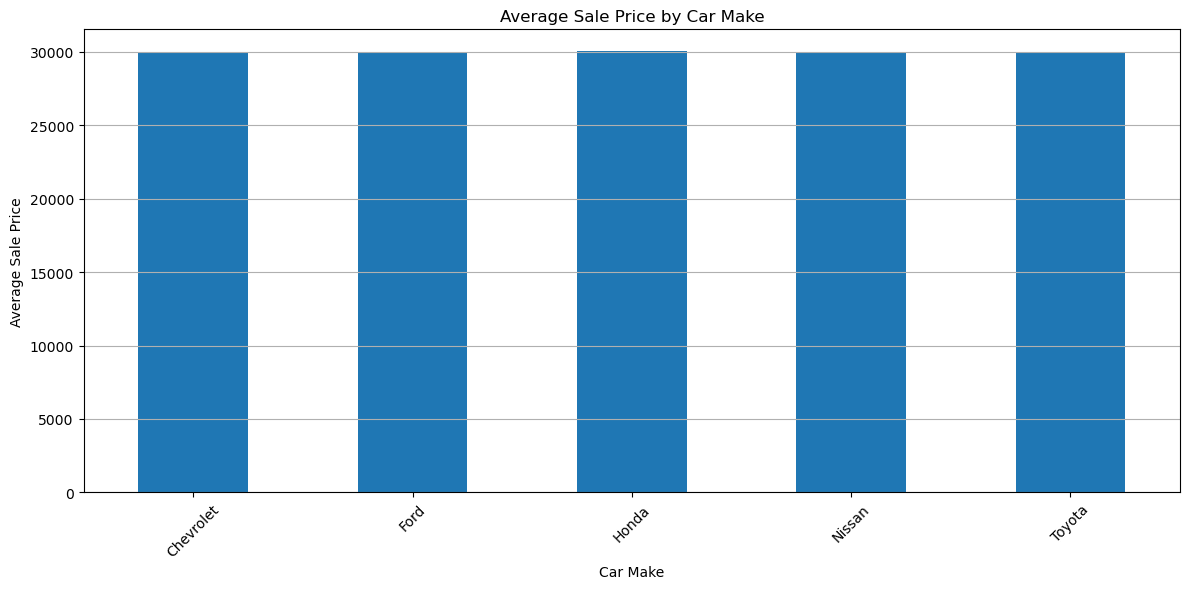

In [168]:
# Average Sale Price by Car Make

average_sale_per_make = data.groupby('Car Make')['Sale Price'].mean()

# Creation of bar chart
plt.figure(figsize=(12, 6))
average_sale_per_make.plot(kind='bar', colormap='tab20')
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Make')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* This bar chart reveals potential differences in the average sale prices across various car makes.
* The car make (Honda) has a slighlty higher average sale price compared to other car makes.
* Whilst the rest of the car makes(Chevrolet, Ford, Nissan, Toyota) have the same average sale prices($30,000).

C:\Users\vwrrnsabsace\AppData\Local\Temp\ipykernel_16164\270130929.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sale_price_per_model = data.groupby('Car Model')['Sale Price'].mean()


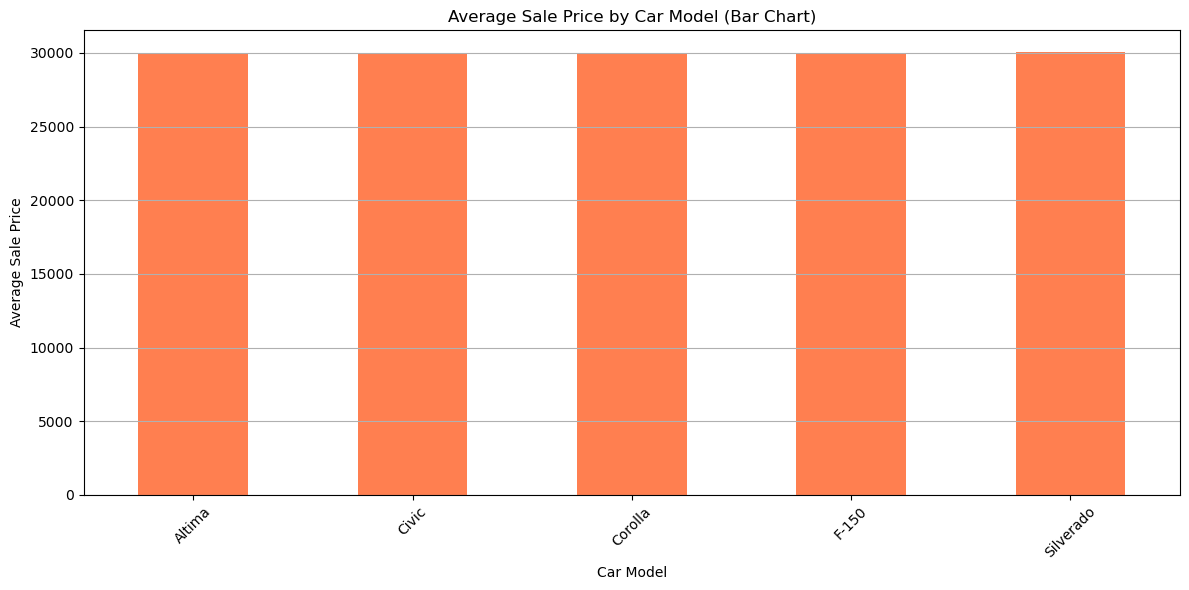

In [175]:
# average sale price by car model

average_sale_price_per_model = data.groupby('Car Model')['Sale Price'].mean()

# Creation of bar chart
plt.figure(figsize=(12, 6))
average_sale_price_per_model.plot(kind='bar', color='coral') 
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Model (Bar Chart)')
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
* This bar chart reveals potential differences in the average sale prices across various car nodels.
* The car model (Silverado) has a slighlty higher average sale price compared to other car makes.
* Whilst the rest of the car models(Altima, Civic, Corolla, F-150) have the same average sale prices($30,000).

<Figure size 1200x600 with 0 Axes>

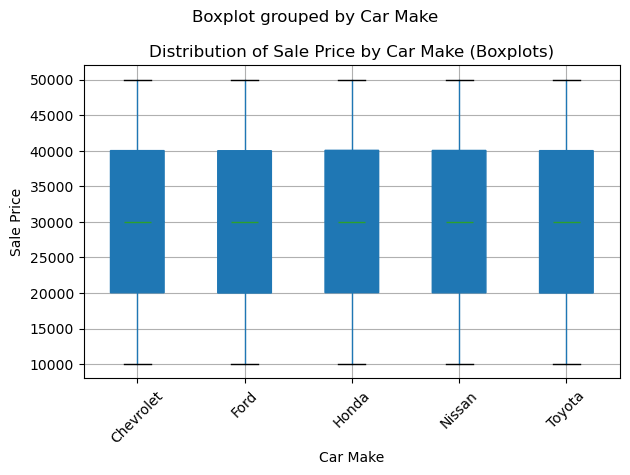

In [170]:
# Boxplots for Sale Price by Car Make

# Creating the boxplot
plt.figure(figsize=(12, 6))
data.boxplot(by='Car Make', column='Sale Price', notch=True, vert=True, patch_artist=True)
plt.xlabel('Car Make')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Price by Car Make (Boxplots)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

* The sale price that separates the higher half from the lower half of the sales is $30,000(median).
* The first quartile (Q1), which is the price at which 25% of the sales for that car make fall below is $20,000 throughout the car makes.
* The third quartile (Q3), which is the price at which 75% of the sales for that car make fall below is $40,000 throughout the car makes.
* The IQR is equal to Q3($40,000) Substract Q1($20,000), Which is $20,000
* With the smallest value = $10 000, and largest value = $50 000
* Inturn there are no outliers in the sales data set

<Figure size 1000x600 with 0 Axes>

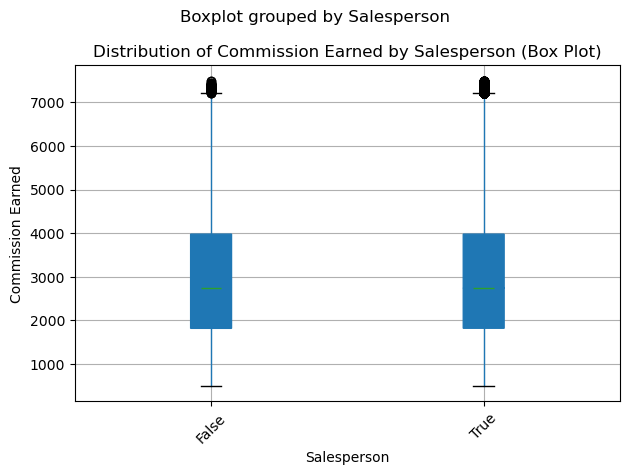

In [176]:
# Box Plot (Distribution of Commission) (

#Creating box plot
plt.figure(figsize=(10, 6))
data.boxplot(by='Salesperson', column='Commission Earned', notch=True, vert=True, patch_artist=True)
plt.xlabel('Salesperson')
plt.ylabel('Commission Earned')
plt.title('Distribution of Commission Earned by Salesperson (Box Plot)')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
$2741910



C:\Users\vwrrnsabsace\AppData\Local\Temp\ipykernel_16164\1442716548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commission_per_model = data.groupby('Car Model')['Commission Earned'].sum()


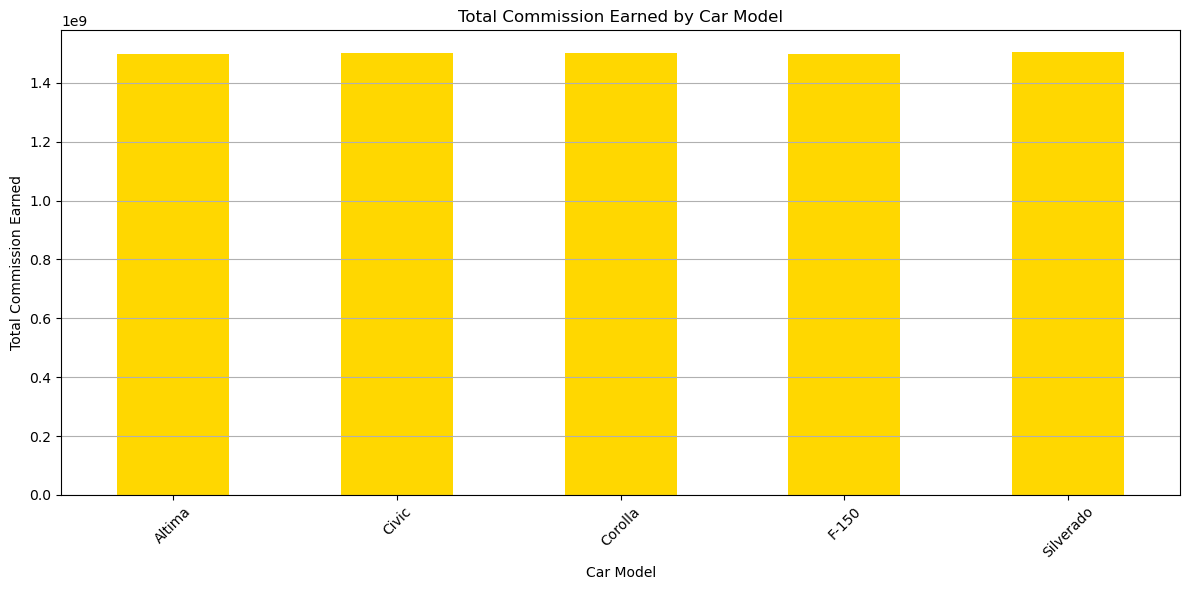

In [171]:
commission_per_model = data.groupby('Car Model')['Commission Earned'].sum()
plt.figure(figsize=(12, 6))
commission_per_model.plot(kind='bar', color='gold')  # Consider colormaps for many models
plt.xlabel('Car Model')
plt.ylabel('Total Commission Earned')
plt.title('Total Commission Earned by Car Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (adjust as needed)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* The Car model(silverado) generates a slightly higher commission probably based on the sale price of the model which in turn leads to higher commission rate.
* Whilst the rest of the car models(Altima, Civic, Corolla, F-150) generates the lowest/almost equal commission 

C:\Users\vwrrnsabsace\AppData\Local\Temp\ipykernel_16164\1534651146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_commission_by_price_range = data.groupby(sale_price_ranges)['Commission Rate'].mean()


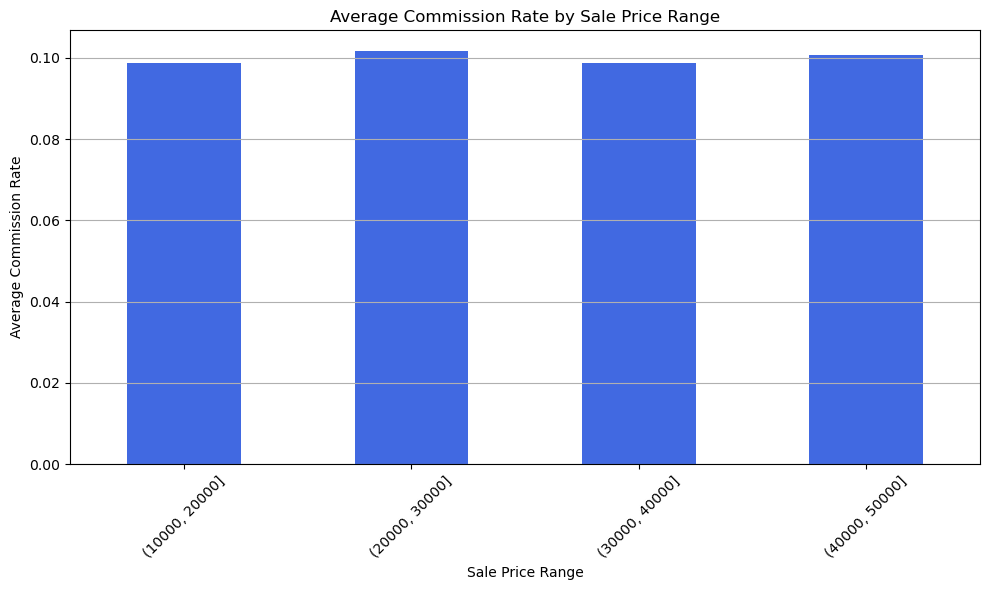

In [128]:
# Define sale price ranges (adjust bin counts and labels as needed)
sale_price_ranges = pd.cut(data['Sale Price'], bins=[10000, 20000, 30000, 40000, 50000])

# Calculate average commission rate within each sale price range
avg_commission_by_price_range = data.groupby(sale_price_ranges)['Commission Rate'].mean()

observed=True

plt.figure(figsize=(10, 6))
avg_commission_by_price_range.plot(kind='bar', color='royalblue')
plt.xlabel('Sale Price Range')
plt.ylabel('Average Commission Rate')
plt.title('Average Commission Rate by Sale Price Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability (adjust as needed)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

* From this output it's clear that higher sale prices do not lead to higher average commission slightly though.
* The sale range ($20 000 - $30 000) lead to a higher average commission rate.
* Whilst the highest sale range ($40 000 - $50 000) lead to a slightly lower average commission rate compared to the $20 000 - $30 000 range.

In [177]:
#  
numerical_data = data.select_dtypes(include=[np.number])  
correlation_matrix = numerical_data.corr()

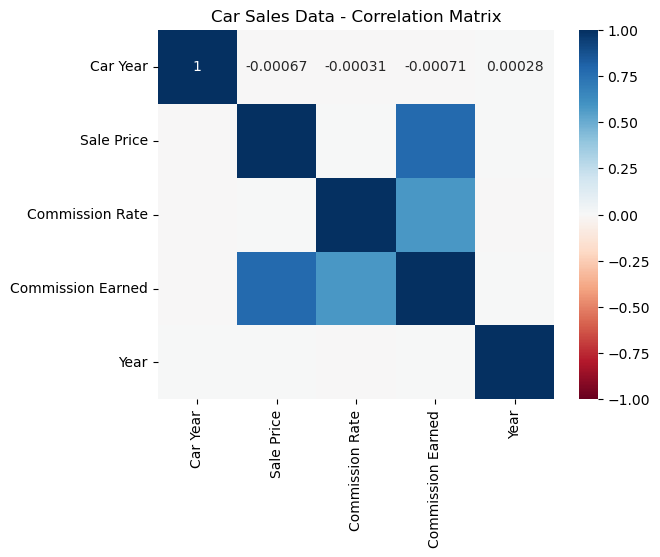

In [182]:
sns.heatmap(correlation_matrix, cmap='RdBu', vmin=-1, vmax=1, annot=True)  # A
plt.title('Car Sales Data - Correlation Matrix')
plt.show()

* There is strong correlation for the sale price and commission earned columns as the commission earned by a salesperson depends on the sale price

C:\VWRRNSABSACE\BCom Hons. IS\Learning from Data\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


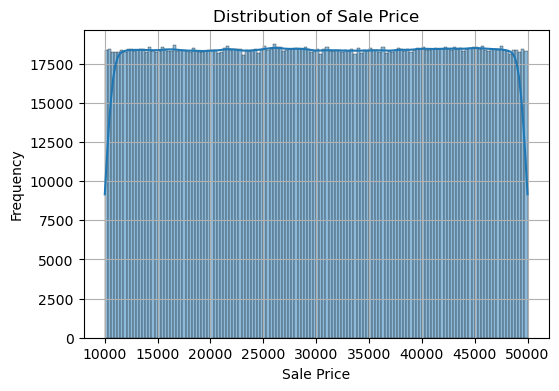

C:\VWRRNSABSACE\BCom Hons. IS\Learning from Data\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


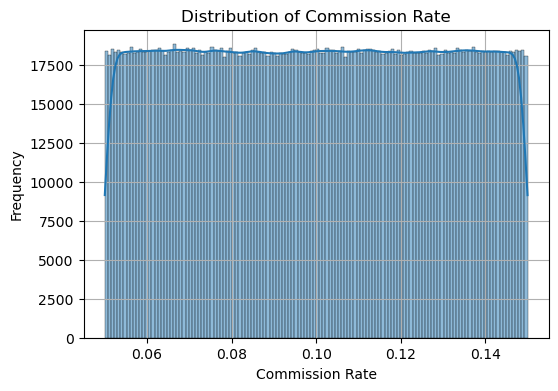

C:\VWRRNSABSACE\BCom Hons. IS\Learning from Data\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


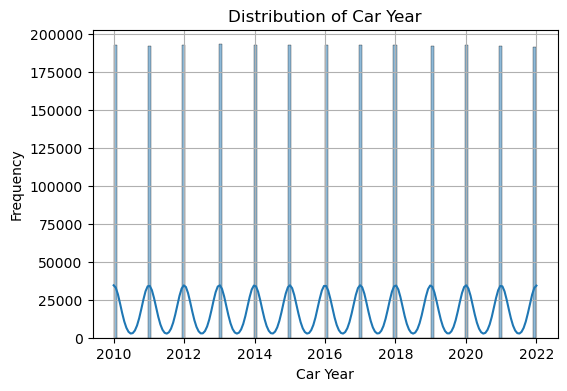

In [183]:
#exploring the distribution of numerical features

numerical_columns = ['Sale Price', 'Commission Rate', 'Car Year']

for col in numerical_columns:
  plt.figure(figsize=(6, 4))
  sns.histplot(data=data, x=col, kde=Tru e)  
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.grid(True)
  plt.show()

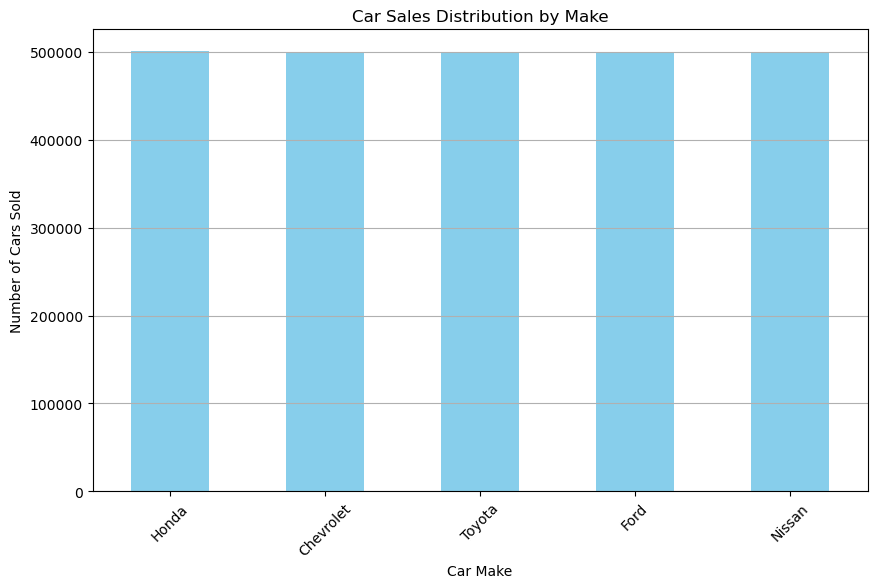

In [190]:
#Bar chart of car sales count by Car Make

make_counts = data['Car Make'].value_counts()e
plt.figure(figsize=(10, 6))
make_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.title('Car Sales Distribution by Make')
plt.xticks(rotationeeded)
plt.grid(axie y-axis
plt.show()

The car that makes the slighlty highest sale is Honda whilst the other car make are slighlty making the same number sales.

C:\Users\vwrrnsabsace\AppData\Local\Temp\ipykernel_16164\3287677640.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Sale Price'], shade=True)  # Add shading for density visualization
C:\VWRRNSABSACE\BCom Hons. IS\Learning from Data\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


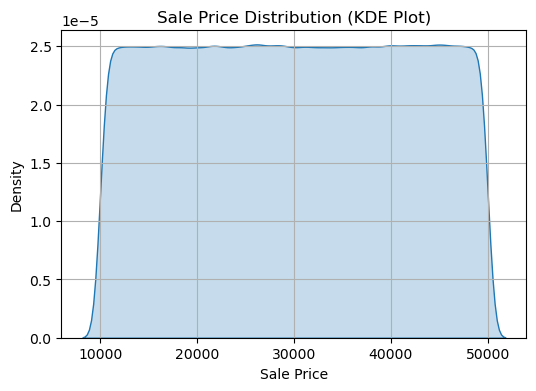

In [191]:
# KDE plot of Sale Price

plt.figure(figsize=(6, 4))
sns.kdeplot(data['Sale Price'], shade=True)  
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Sale Price Distribution (KDE Plot)')
plt.grid(True)
plt.show()

The shape of the sale price distrbution is normally skewed.

In [186]:
# Linear regression to understand if sale price(dependble variable) is influenced by the car year (independent variable)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['Car Year']]  #(independent variable)
y = data['Sale Price']  #(dependent variable)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data 80/20 

In [187]:
# Creation of a linear regression model
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [188]:
# Calculation R Squared to evaluate performance

y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared: 5.58074358836258e-07
Mean Squared Error: 133283832.29300003


* With R-Squared more than 1, the independant variable(car year) does not influence the dependent varial probabaly the car model would do.

                                                            Conclusion

My analysis of the car sales data revealed valuable insights into sales trends, salesperson performance, and potential relationships between car features and sales. The dataset included details like car model, make, salesperson, sale price, commission rates, and car year.

The top-selling car models were Silverado, Civic, Corolla, F-150, and Altima. Similarly, Honda, Chevrolet, Toyota, Ford, and Nissan emerged as the top-selling car makes.

I thouroughly cleaned the data set before getting insights, the car make with the slightly highest average sale price was Honda, model was silverado
as for the commission the salesperson earned slightly a higner average commssion from a sale of the car model silvarado

also checked the relationship between higher sale prices and commission turns out it all depends on the rate at that point in time for the salesperson
sale distribution was normal 

the heat map showed a strong correlation between sale price and commission earned 



                                            Reflections on Data Analysis: Python vs. Excel and Room for Improvement


This recent assignment clearly outlined the key differences between Python and Excel for data analysis. While Excel offers a user-friendly interface for basic tasks and visualizations, Python's power lies in its flexibility and automation.

**Strengths of Python:**

- **Advanced Analysis:** Python excels at complex data manipulation, statistical modeling, and machine learning. It allows for intricate calculations and custom functions beyond Excel's capabilities.
- **Automation:**  Python empowers you to automate repetitive tasks through scripting, saving significant time and reducing the risk of human error when dealing with large datasets.
- **Integration:** Python seamlessly integrates with various data science libraries like pandas, NumPy, and Scikit-learn, providing a robust toolkit for comprehensive analysis.

**When to Choose Excel:**

- **Simple Data Exploration:**  Excel remains a valuable tool for initial data exploration, basic calculations, and quick visualizations due to its intuitive interface.
- **Data Sharing:**  Excel spreadsheets are widely used and easily shared across different platforms, making them a convenient option for data collaboration.

**Looking Back:**

If I could revisit this assignment, I'd delve deeper into the Python libraries used. Understanding the functionalities of libraries like pandas and Seaborn would have allowed for more efficient data manipulation and customized visualizations.

**Gaps in Knowledge:**

This experience highlighted gaps in my programming and statistical knowledge. I'd like to focus on:

- **Advanced Python Programming:**  Learning object-oriented programming principles and exploring more advanced data structures in Python will enhance my ability to build complex data analysis tools.
- **Statistical Modeling:**  Strengthening my understanding of statistical models like linear regression and time series analysis would enable me to extract deeper insights from data.

By bridging these knowledge gaps, I can leverage the power of Python for future data analysis endeavors. This combination of programming and statistical proficiency will equip me to tackle increasingly complex data challenges. 